In [155]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [184]:
# load crime data
# crime_path = os.path.join('data', 'crime', 'crime_rate_per_100_all.csv')
crime_path = os.path.join('data', 'crime', 'crime_all.csv')
crime_df = pd.read_csv(crime_path)
crime_df = crime_df.drop(crime_df.index[11])
crime_df.head(5)

,State,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,2000,202159,26641,299092,110019,1266714,171304,110091,35090,910154,...,17511,278218,1033311,99958,18185,214348,300932,47067,172124,16285
1,2001,192835,26895,322549,111296,1346557,186379,106791,32267,913230,...,17644,295770,1098809,96307,16978,228445,308492,46120,179410,17392
2,2002,200331,27745,348467,112672,1384872,195936,103719,31803,905957,...,17342,290961,1130292,103129,15600,229039,309931,45320,176987,17858
3,2003,201572,28130,342973,111141,1420637,195046,101537,33046,881976,...,16624,296010,1138623,105207,14303,220106,312820,47375,169842,17962
4,2004,201664,26331,335699,124201,1425264,197527,102078,30992,850895,...,16227,295147,1132256,103246,15039,220227,322167,50421,158258,18052


In [185]:
# load education data
education_path = os.path.join('data', 'education', 'actualls_all.csv')
education_df = pd.read_csv(education_path)
education_df = education_df.drop('Total', 1)
education_df = education_df.drop(education_df.index[[0,1,2]])
education_df = education_df.reset_index(drop=True)
education_df.head()

,State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2000,557767814.00,177881580.00,667976456.00,328403457.00,3792096590.00,370882855.00,288895735.00,85735787.00,1590311741.00,...,133366735.00,583465744.00,2484215057.00,255609306.00,91491401.00,641092965.00,569577741.00,257981746.00,530100703.00,86526320.00
1,2001,1205096441.00,227988480.00,1990909460.00,618218324.00,7895473833.00,1061188114.00,703315579.00,187754734.00,3622745422.00,...,296723889.00,1326565262.00,4760220857.00,510599570.00,253879970.00,1564714192.00,1253035444.00,520774265.00,1205201789.00,152676575.00
2,2002,1387975241.00,260180178.00,2520137525.00,733650835.00,9092121808.00,1238777106.00,825970250.00,216149404.00,4124966740.00,...,342344861.00,1514613174.00,5638643478.00,594855398.00,276976033.00,1772711389.00,1501299011.00,593509323.00,1357291868.00,182179355.00
3,2003,1584581070.00,280079667.00,3103945066.00,829601733.00,9928105199.00,1416997560.00,908683240.00,226632147.00,4631097940.00,...,373160375.00,1705965593.00,6541541039.00,674510076.00,304548823.00,1952288975.00,1663743593.00,677382817.00,1511374487.00,211058170.00
4,2004,1672101861.00,299103691.00,4312713049.00,888970231.00,10825485264.00,1665593582.00,965299387.00,286492122.00,5181788479.00,...,375611344.00,1895812898.00,7207764023.00,762450195.00,318894589.00,2122509463.00,1780464671.00,714586624.00,1613726426.00,258093648.00


In [186]:
# Assign the data to X and y
X = education_df['Alabama'].values.reshape(-1,1)
y = crime_df['ALABAMA'].values.reshape(-1,1)

print(X.shape, y.shape)

(11, 1) (11, 1)


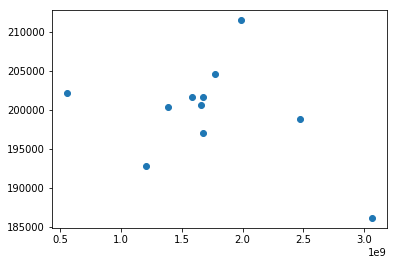

In [187]:
# Plot education and crime rate and check for linear data
plt.scatter(X, y)

# Linear Regression

In [188]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [189]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [190]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[ -3.64653371e-06]]
y-axis intercept:  [ 206052.34540076]


Linear model: y = 4.74838429 - 2.21354114e-10x

In [191]:
# Make predictions
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [202159]
Predicted output: [ 204018.4262635]
Prediction Error: [ 1859.4262635]


In [193]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 32619630.22006719
R-squared (R2 ): 0.13441686013485687


In [194]:
# Get minimum and maximum input values
x_min = X.min()
x_max = X.max()
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
print(type(x_min))

Min X Value: 1205096441.00
Max X Value: 557767814.00
<class 'str'>


In [195]:
# Get minimum and maximum output values
y_min_actual = y.min()
y_max_actual = y.max()
print(f"Min y Value: {y_min_actual}")
print(f"Max y Value: {y_max_actual}")
print(type(y_min_actual))

Min y Value: 186148
Max y Value: 211454
<class 'numpy.int64'>


In [167]:
# # Calculate the min and max output values using model.predict
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
# print(f"Actual Min Value: {y_min_actual}")
# print(f"Predicted Min Value: {y_min}")
# print(f"Actual Max Value: {y_max_actual}")
# print(f"Predicted Max Value: {y_max}")

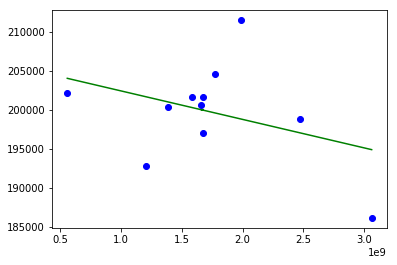

In [196]:
# show the model fit by plotting the predicted values against the original data
plt.scatter(X, y, c='blue')
# plt.plot([x_min, x_max], [y_min, y_max], c='red', lw=1)
plt.plot(X, predictions, 'green')

# Prediction

In [197]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [198]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [199]:
# Fit the model to the training data and calculate the overall scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1601062765557516
Testing Score: -1.7788217316639214


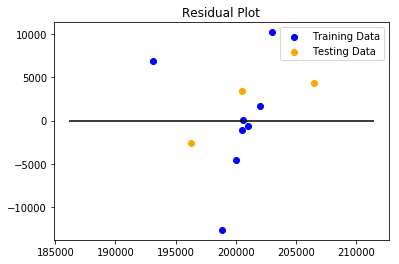

In [200]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [201]:
y_train.shape

(8, 1)

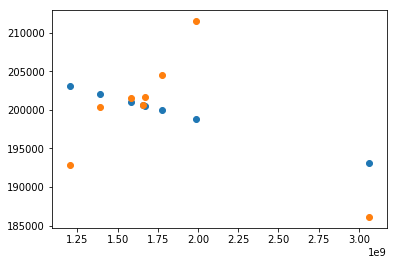

In [202]:
plt.scatter(X_train, model.predict(X_train))
plt.scatter(X_train, y_train)

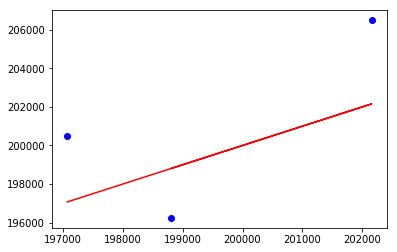

In [203]:
# Make predictions using the X_test data
# Plot y_test vs y_test
# Scatter plot y_test vs predictions

predictions = model.predict(X_test)
plt.scatter(y_test, predictions, c='blue')
plt.plot(y_test, y_test, c='red')
plt.show()

In [204]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 12391727.573808582, R2: -1.7788217316639214


In [205]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[ -5.35916225e-06]]
y-axis intercept:  [ 209489.34452107]


Linear model: y = 4.85681945 - 2.74127754e-10x